# CS5590: Foundations of Machine Learning
## Assignment 1
## Question 3
## Authors 
|Name|Roll number|
|:--|--:|
|Raj Patil|CS18BTECH11039|
|Karan Bhukar|CS18BTECH11021|

# Question 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from scipy.special import factorial 
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [6]:
data = pd.read_csv('HorseKicks.txt',delimiter='\t',index_col=0).transpose()
data['Totals']=data.sum(axis=1)
d=data;d

Year,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,...,1886,1887,1888,1889,1890,1891,1892,1893,1894,Totals
GC,0,2,2,1,0,0,1,1,0,3,...,2,1,0,0,1,0,1,0,1,16
C1,0,0,0,2,0,3,0,2,0,0,...,1,1,1,0,2,0,3,1,0,16
C2,0,0,0,2,0,2,0,0,1,1,...,0,2,1,1,0,0,2,0,0,12
C3,0,0,0,1,1,1,2,0,2,0,...,0,1,0,1,2,1,0,0,0,12
C4,0,1,0,1,1,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,8
C5,0,0,0,0,2,1,0,0,1,0,...,1,0,1,1,1,1,1,1,0,11
C6,0,0,1,0,2,0,0,1,2,0,...,1,3,1,1,1,0,3,0,0,17
C7,1,0,1,0,0,0,1,0,1,1,...,0,2,0,0,2,1,0,2,0,12
C8,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,7
C9,0,0,0,0,0,2,1,1,1,0,...,1,1,0,1,2,0,1,0,0,13


In [7]:
train = d.iloc[:,:13]
test = d.iloc[:,-8:-1]

In [8]:
train.head()

Year,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887
GC,0,2,2,1,0,0,1,1,0,3,0,2,1
C1,0,0,0,2,0,3,0,2,0,0,0,1,1
C2,0,0,0,2,0,2,0,0,1,1,0,0,2
C3,0,0,0,1,1,1,2,0,2,0,0,0,1
C4,0,1,0,1,1,1,1,0,0,0,0,1,0


In [9]:
test.head()

Year,1888,1889,1890,1891,1892,1893,1894
GC,0,0,1,0,1,0,1
C1,1,0,2,0,3,1,0
C2,1,1,0,0,2,0,0
C3,0,1,2,1,0,0,0
C4,0,0,0,1,1,0,0


In [10]:
test.sum(axis=1)

GC      3
C1      7
C2      4
C3      4
C4      2
C5      6
C6      6
C7      5
C8      3
C9      4
C10     8
C11    12
C14     5
C15     4
dtype: int64

# Description

 - modelling the data as a poisson distribution, independently for each corp
$$ N_{deaths}\sim \mathcal P(\theta) $$
 - note that there are no input features in this case and only a parameter dependent output 
 - once we find $\theta$ from the training set, the prediction will be the mode of the distribution i.e $\lfloor \theta \rfloor$ if we are predicting the answer for one year
 - but in this case(seven years), the prediction will be $\lfloor7(\theta)\rfloor$ as  $\theta$ represents the death rate per year

## Question 3.1:
### ML estimate

 - for a corp, the number of deaths every year independently and identically follow our poisson model
 - hence for a corp, the likelihood over $D$ years (with death $d_i$ for year $i$) is given by...
\begin{align}
\mathcal L(\theta) &= \prod\limits_{i=1}^{D} {\theta^{d_i}e^{-\theta} \over (d_i)!} \\
\therefore ln(\mathcal L(\theta)) &= \sum\limits_{i=1}^{D} \left( {d_iln(\theta) - \theta - ln((d_i)!)} \right) \\
\theta_{ML} &= \underset{\theta}{argmax} (ln(\mathcal L(\theta)))\\
\text{which } & \text{occurs at}\\
\underset{\theta}{\nabla}(ln(\mathcal L(\theta)) &= 0 = \sum\limits_{i=1}^{D}({d_i \over \theta} - 1)\\
\therefore \theta_{ML} &= { \sum\limits_{i=1}^{D}d_i \over D}
\end{align}
 - this is simply the mean of the deaths over the years
 - note that we do not have any features to account for and we are estimating $\theta$ directly hence we have a closed form solution

In [11]:
theta_ML = train.mean(axis=1)
theta_ML

GC     1.000000
C1     0.692308
C2     0.615385
C3     0.615385
C4     0.461538
C5     0.384615
C6     0.846154
C7     0.538462
C8     0.307692
C9     0.692308
C10    0.538462
C11    1.000000
C14    1.461538
C15    0.307692
dtype: float64

# predictions

In [12]:
years = test.shape[1]
predictions = pd.Series(np.floor(theta_ML*years),dtype=np.int)
predictions

GC      7
C1      4
C2      4
C3      4
C4      3
C5      2
C6      5
C7      3
C8      2
C9      4
C10     3
C11     7
C14    10
C15     2
dtype: int64

In [13]:
actuals = test.sum(axis=1)
actuals

GC      3
C1      7
C2      4
C3      4
C4      2
C5      6
C6      6
C7      5
C8      3
C9      4
C10     8
C11    12
C14     5
C15     4
dtype: int64

# Calculating error

$$E_{RMS} = \sqrt{\sum\limits_{C_i\in C} (y_{C_i} - \hat y_{C_i})^2 \over |C| }$$

In [14]:
rmse_ML = np.sqrt(
    (
        ((actuals - predictions)**2).sum()
        /
        years
    )
)
rmse_ML

4.2594432902501635

## Question 3.2
## MAP estimate

Assuming the prior to be an exponential distribution by the following intuition:
- the chances of lower rate of deaths are significantly greater than that of a higher rate of deaths
$$\theta \sim \mathcal E(\lambda)$$
$$f(\theta) = \lambda e^{-\lambda\theta}$$
choosing the value of $\lambda$ to be 1
$$f(\theta) = e^{-\theta}$$

- Why not generalized gamma?:
    - although exponential is a subset of the gamma function, we don't prefer to use the general gamma as that involves deliberately choosing a finite non-zero peak which will involve some sort of a look at the number of deaths from the training set 
    - one could say that the mode of the prior is being selected as a hyper-parameter and then one could distribute the training set further into a validation set for selecting the hyper-parameter but that defeats the notion of a "prior"

## Maximizing the posterior...
... after viewing data for $D$ years

$$p(\theta|D) = {p(D|\theta)\cdot p(\theta) \over p(D)}$$
here $p(D|\theta)$ is the likelihood as given before : 
$$p(D|\theta) = \mathcal L(\theta) = \prod\limits_{i=1}^{D} {\theta^{d_i}e^{-\theta} \over (d_i)!}$$
Maximizing the natural log of the posterior will yield the same results due the monotonic nature of the logarithmic function
$$\therefore ln(p(\theta|D)) = ln(p(D|\theta) + ln(p(\theta)) - ln(p(D))$$
$$\theta_{MAP} = \underset{\theta}{argmax}\ ln(p(\theta|D))$$ 
$$ \underset{\theta}{\nabla}\  ln(p(D|\theta) + ln(p(\theta))  =0$$ 
$$ \underset{\theta}{\nabla}\sum\limits_{i=1}^{D}\left( d_i\cdot ln(\theta) - \theta \right) -\theta = 0 $$
$$ \theta_{MAP} = {\sum\limits_{i=1}^{D}d_i \over D + 1}$$

In [15]:
train

Year,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887
GC,0,2,2,1,0,0,1,1,0,3,0,2,1
C1,0,0,0,2,0,3,0,2,0,0,0,1,1
C2,0,0,0,2,0,2,0,0,1,1,0,0,2
C3,0,0,0,1,1,1,2,0,2,0,0,0,1
C4,0,1,0,1,1,1,1,0,0,0,0,1,0
C5,0,0,0,0,2,1,0,0,1,0,0,1,0
C6,0,0,1,0,2,0,0,1,2,0,1,1,3
C7,1,0,1,0,0,0,1,0,1,1,0,0,2
C8,1,0,0,0,1,0,0,1,0,0,0,0,1
C9,0,0,0,0,0,2,1,1,1,0,2,1,1


In [16]:
theta_MAP = train.sum(axis=1) / (train.shape[1]+1)
theta_MAP[2]

0.5714285714285714

In [17]:
# sanity check
theta_MAP < theta_ML

GC     True
C1     True
C2     True
C3     True
C4     True
C5     True
C6     True
C7     True
C8     True
C9     True
C10    True
C11    True
C14    True
C15    True
dtype: bool

# predictions

In [18]:
years = test.shape[1]
predictions = pd.Series(np.floor(theta_MAP*years),dtype=np.int)
predictions

GC     6
C1     4
C2     4
C3     4
C4     3
C5     2
C6     5
C7     3
C8     2
C9     4
C10    3
C11    6
C14    9
C15    2
dtype: int64

In [19]:
actuals = test.sum(axis=1)
actuals

GC      3
C1      7
C2      4
C3      4
C4      2
C5      6
C6      6
C7      5
C8      3
C9      4
C10     8
C11    12
C14     5
C15     4
dtype: int64

# Calculating error

$$ E_{RMS} = \sqrt{\sum\limits_{C_i\in C} (y_{C_i} - \hat y_{C_i})^2 \over |C| }$$

In [20]:
rmse_MAP = np.sqrt(
    (
        ((actuals - predictions)**2).sum()
        /
        years
    )
)
rmse_MAP

4.174754056057845

In [21]:
rmse_MAP < rmse_ML

True

# This solidifies that our intuition is somewhat sane

## Plots

In [22]:
def likelihood(theta,total_deaths,pro_fac):
  return (pow(theta,total_deaths)*(np.exp(theta*(-13))))/pro_fac

In [23]:
def prior(x):
  return np.exp(-1*x)

In [24]:
def posterior(theta,total_deaths,pro_fac):
  return (pow(theta,total_deaths)*(np.exp(theta*(-13))))*(np.exp(-1*theta))/(pro_fac) 

In [25]:
def plot(c_num, train,theta_MAP,theta_ML):
  total_deaths = train.sum(axis=1)[c_num]
  print(total_deaths)
  pro_fac = 0
  for i in range(0,13):
    pro_fac = pro_fac + factorial(train.iat[c_num,i],exact = True)
  figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
  x = np.arange(0,1.75,.01)
  host = host_subplot(111, axes_class=AA.Axes)
  plt.subplots_adjust(right=0.75)
  par1 = host.twinx()
  par2 = host.twinx()

  offset = 30
  new_fixed_axis = par2.get_grid_helper().new_fixed_axis
  par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                          offset=(offset, 0))
  
  y = np.arange(0,1,.01)

  par2.axis["right"].toggle(all=True)
  host.set_xlabel("Theta")
  host.set_ylabel("Density")
  par1.set_ylabel("Density")
  par2.set_ylabel("Density")
  p1, = host.plot(x,prior(x),label="Prior")
  p2, = par1.plot(x,likelihood(x,total_deaths,pro_fac),linestyle='--',label="Likelihood")
  p3, = par2.plot(x,posterior(x,total_deaths,pro_fac),linestyle=':',label="Posterior")
  plt.axvline(x=theta_MAP,color='m',linestyle="dotted",label="Theta_MAP")
  plt.axvline(x=theta_ML,color='y',linestyle="dotted",label="Theta_ML")
  host.legend()
  host.axis["left"].label.set_color(p1.get_color())
  par1.axis["right"].label.set_color(p2.get_color())
  par2.axis["right"].label.set_color(p3.get_color())
  plt.draw()
  plt.show()
  

## corp 2

8


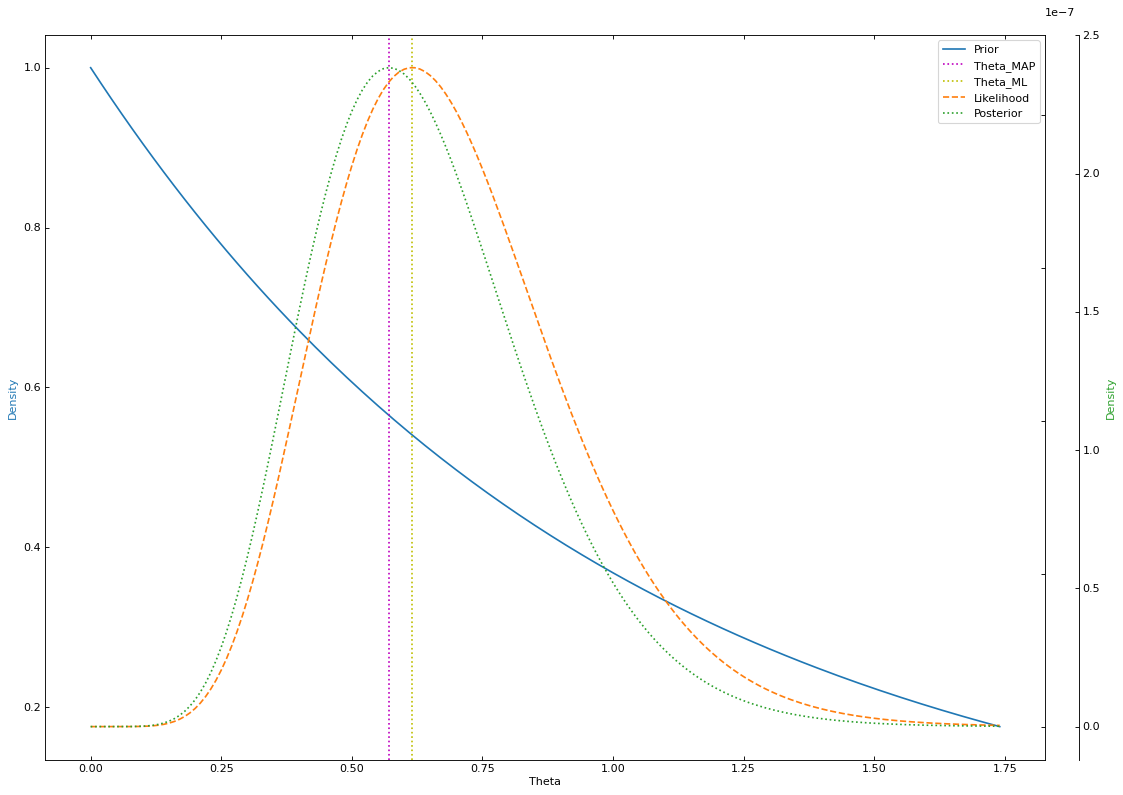

In [26]:
plot(2,train,theta_MAP[2],theta_ML[2])

## corp 4

6


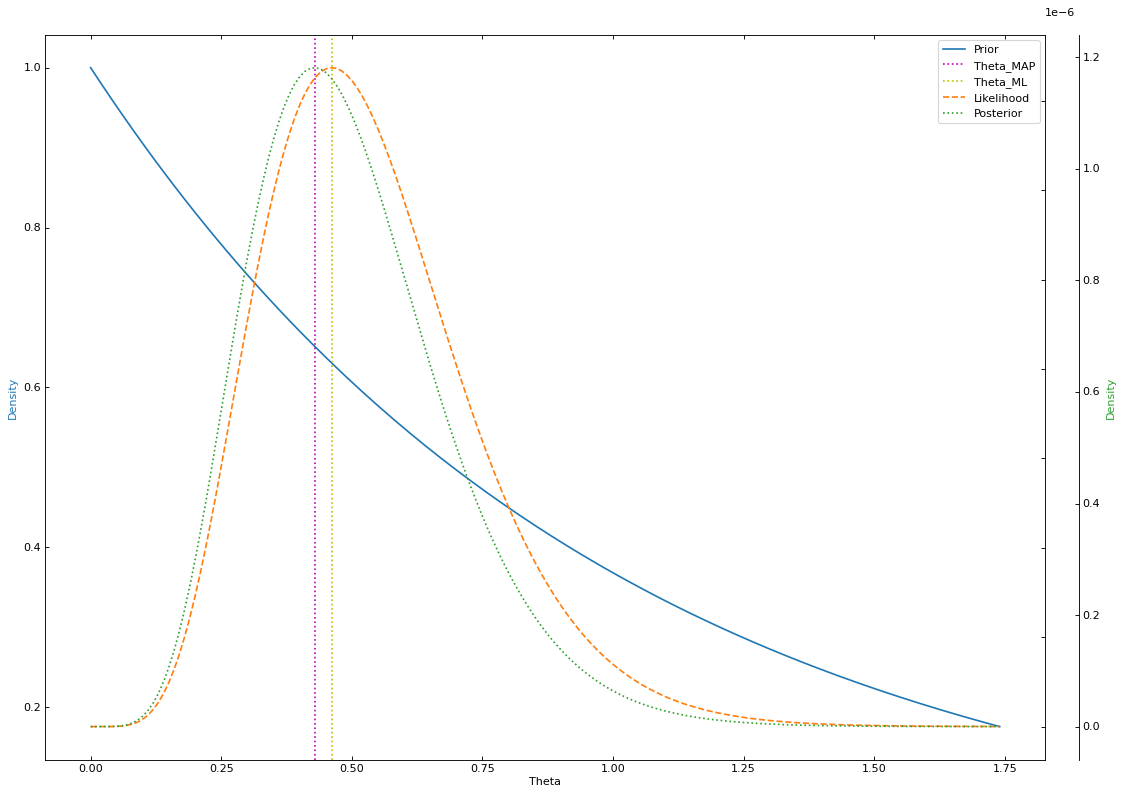

In [27]:
plot(4,train,theta_MAP[4],theta_ML[4])

## corp 6

11


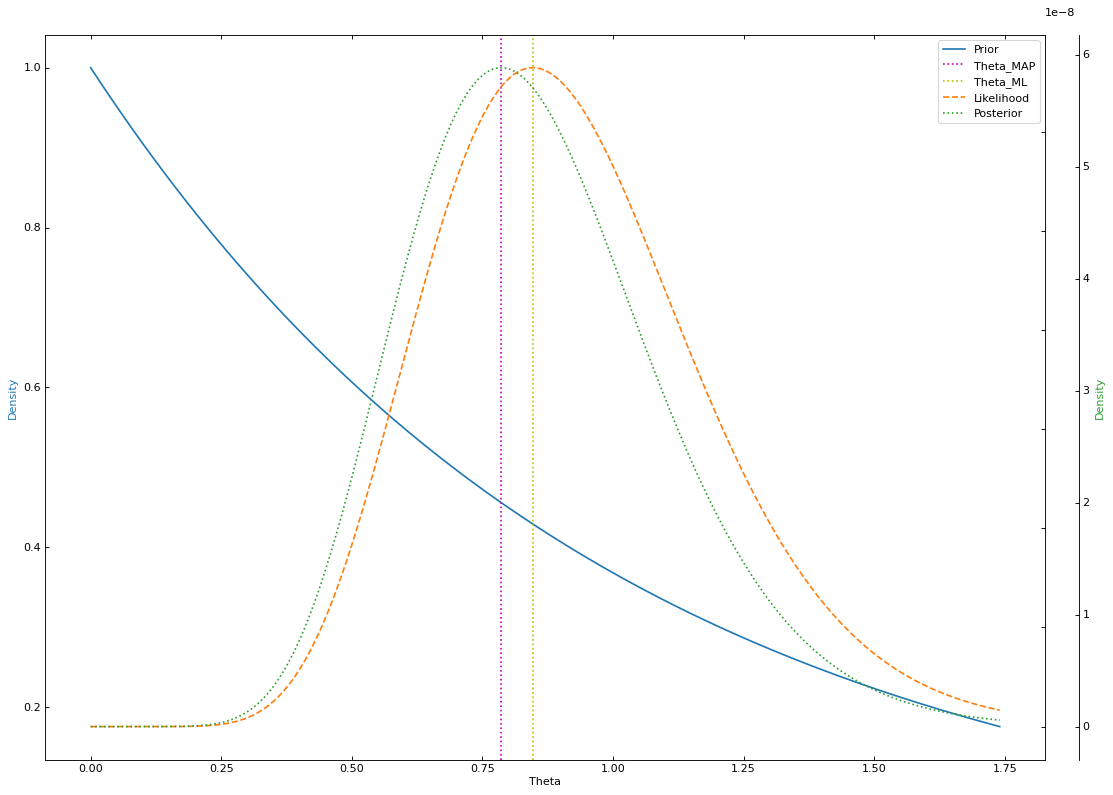

In [28]:
plot(6,train,theta_MAP[6],theta_ML[6])

### note that the mode of the posterior lies between that of the prior and the likelihood
as expected